In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import shapefile as shp
import seaborn as sns
import numpy as np
%matplotlib inline

In [26]:
sns.set(style="whitegrid", palette="pastel", 
       color_codes=True)

In [27]:
sns.mpl.rc("figure", figsize=(10,6))

In [28]:
shp_path = "uganda_administrative.shp"

In [29]:
sf = shp.Reader(shp_path)

In [30]:
len(sf.shapes())

350

In [31]:
sf.records()[9]

Record #9: ['Border Uganda - DR Congo', '2']

In [32]:
sf.fields

[('DeletionFlag', 'C', 1, 0), ['NAME', 'C', 37, 0], ['ADMIN_LEVE', 'C', 1, 0]]

In [33]:
sf.records()[9][0]

'Border Uganda - DR Congo'

### Convert shapefile to pandas Dataframe

In [34]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns = fields, data = records)
    df = df.assign(coords = shps)
    
    return df

In [35]:
df = read_shapefile(sf)
df.shape

(350, 3)

In [36]:
df.head(5)

,NAME,ADMIN_LEVE,coords
0,,,"[(29.4860671, -1.3486397), (29.4880943, -1.348..."
1,,,"[(29.4883488, -0.853185), (29.4887765, -0.8531..."
2,Border Rwanda - DR Congo,2,"[(29.5909494, -1.3885787), (29.5908895, -1.389..."
3,,,"[(29.505449, -1.4650719), (29.5096593, -1.4624..."
4,,8,"[(29.5302844, -1.4709211), (29.5328446, -1.467..."


### Plot a specific shape

In [52]:
def plot_shape(id, s = None):
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        
    plt.plot(x_lon, y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    
    plt.text(x0, y0, s, fontsize = 10)
    
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    return x0, y0
    

In [53]:
df[df.NAME=='Border Rwanda - DR Congo']

,NAME,ADMIN_LEVE,coords
2,Border Rwanda - DR Congo,2,"[(29.5909494, -1.3885787), (29.5908895, -1.389..."


In [54]:
name = 'Border Rwanda - DR Congo'
name_id = df[df.NAME == name].index.get_values()[0]

In [55]:
name_id

2

(29.536454381739127, -1.4118397282608697)

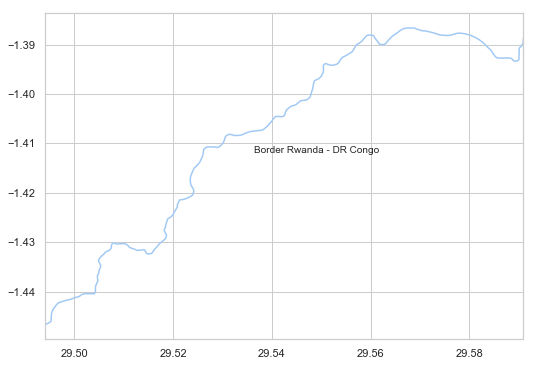

In [56]:
plot_shape(name_id, name)

## Plotting the Entire Map

In [62]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    
    plt.figure(figsize=figsize)
    id = 0
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize = 10)
        id = id + 1
        
        if(x_lim != None) & (y_lim != None):
            plt.xlim(x_lim)
            plt.ylim(y_lim)

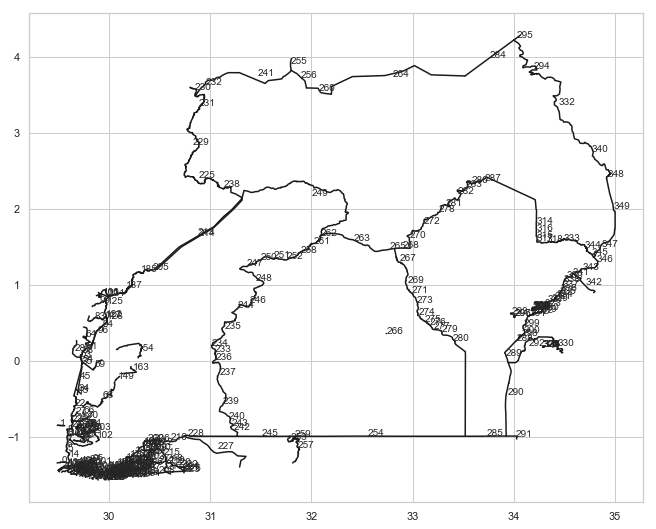

In [63]:
plot_map(sf)

# TODO:
    
    1. Get a shapefile with information on population distribution
    2. Import the shapefile with Pyshp
    3. Visualize the shapefile
    4. Create heatmaps and chlorepleth maps
    
# resources

   [This Blog](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f)
 